# Problem statement

The objective is to cluster the customers of an e-commerce platform into distinct groups based on their purchasing behavior.

The dataset contains the following columns:

- InvoiceNo (integer)
- StockCode (string)
- Description (string)
- Quantity (integer)
- InvoiceDate (date)
- UnitPrice (decimal)
- CustomerID (integer)
- Country (string)

By analyzing the TotalAmount spent and TotalTransactions made by each customer, the company aims to identify different customer segments for targeted marketing strategies, personalized product offerings, and improved customer service.

The clustering process involves data preprocessing, feature engineering, outlier detection and removal, data scaling, and optimal cluster determination through both the Elbow Method and Silhouette Score, culminating in the application of K-Means clustering to categorize customers into meaningful segments.

The notebook contains 6 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)
* [Exercise 3](#ex_3)
* [Exercise 4](#ex_4)
* [Exercise 5](#ex_5)
* [Exercise 6](#ex_6)

In [8]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/data/clustering-data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
#from sklearn_extra.cluster import KMeansExtra

# Step 1: Load the Dataset
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv(data_path, encoding='latin1')

In [10]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


Shape of the DataFrame: (541909, 8)

First few rows of the DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Column names and data types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     objec

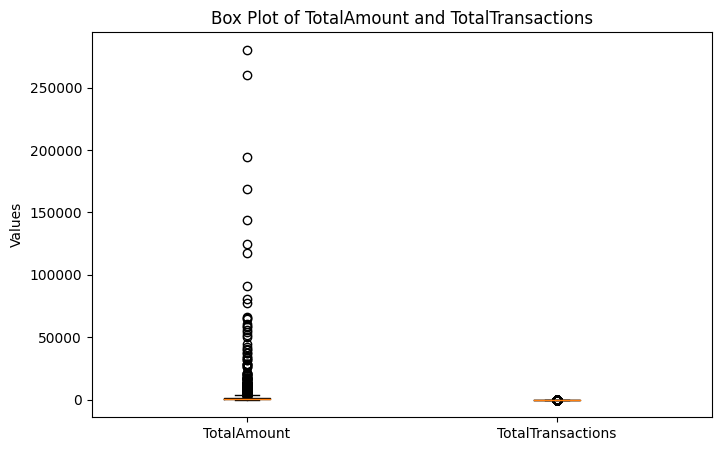

Shape of DataFrame after removing outliers: (3912, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

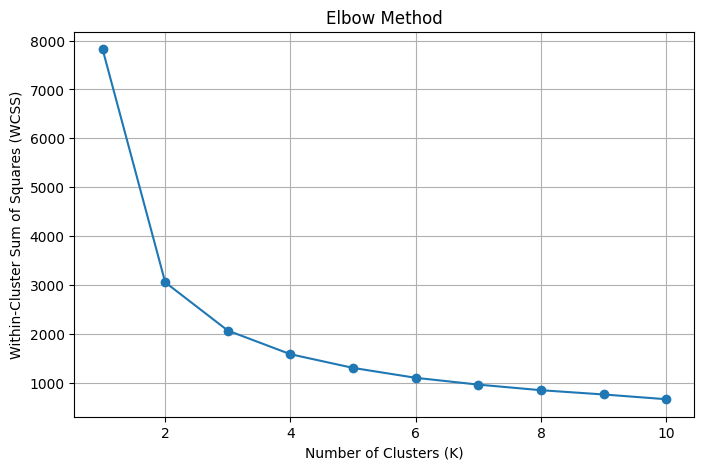

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

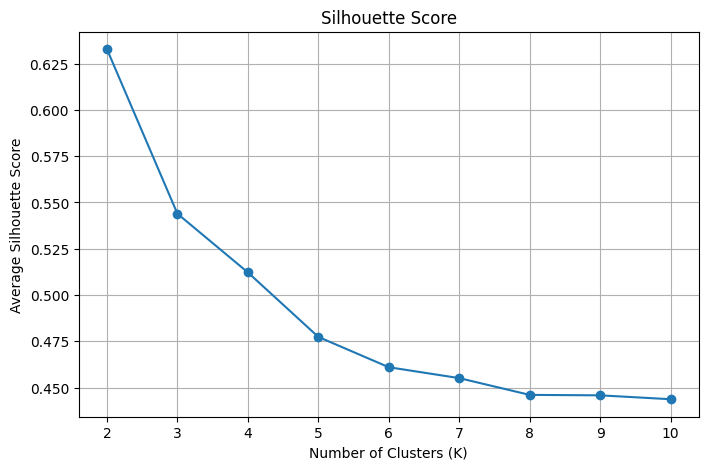

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


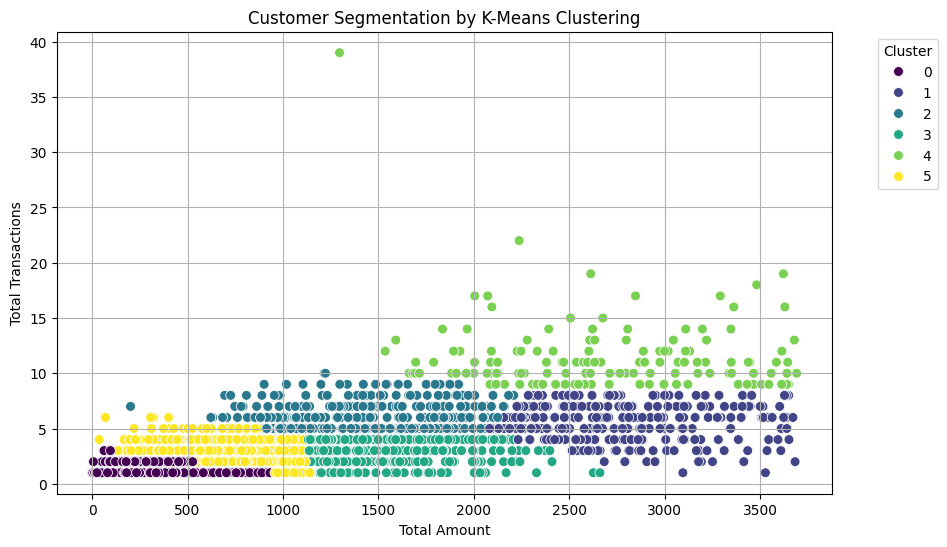

In [11]:
# Step 2: Inspect the Data
print("Shape of the DataFrame:", df.shape)
print("\nFirst few rows of the DataFrame:")
print(df.head())
print("\nColumn names and data types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 3: Summary Statistics
summary_stats = df.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)

# Step 4: Data Preprocessing
df_cleaned = df.dropna(subset=['CustomerID'])
df_cleaned = df_cleaned[(df_cleaned['Quantity'] >= 0) & (df_cleaned['UnitPrice'] >= 0)]
columns_to_drop = ['StockCode', 'InvoiceDate', 'Description', 'Country']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Step 5: Feature Engineering
df_cleaned['Amount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
df_total_amount = df_cleaned.groupby('CustomerID')['Amount'].sum().reset_index()
df_total_amount.rename(columns={'Amount': 'TotalAmount'}, inplace=True)
df_total_transactions = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_total_transactions.rename(columns={'InvoiceNo': 'TotalTransactions'}, inplace=True)
df_segmentation = pd.merge(df_total_amount, df_total_transactions, on='CustomerID')

# Step 6: Checking for Outliers
df_segmentation.drop('CustomerID', axis=1, inplace=True)
plt.figure(figsize=(8, 5))
plt.boxplot([df_segmentation['TotalAmount'], df_segmentation['TotalTransactions']], labels=['TotalAmount', 'TotalTransactions'])
plt.title('Box Plot of TotalAmount and TotalTransactions')
plt.ylabel('Values')
plt.show()

# Step 7: Removing Outliers from TotalAmount column
Q1 = df_segmentation['TotalAmount'].quantile(0.25)
Q3 = df_segmentation['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_segmentation = df_segmentation[(df_segmentation['TotalAmount'] >= lower_bound) & (df_segmentation['TotalAmount'] <= upper_bound)]
print("Shape of DataFrame after removing outliers:", df_segmentation.shape)

# Step 8: Data Scaling using Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segmentation)
df_scaled = pd.DataFrame(df_scaled, columns=df_segmentation.columns)

# Step 9: Finding Optimal Number of Clusters - Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Step 10: Finding Optimal Number of Clusters - Silhouette Score Elbow Method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)
plt.show()

# Step 11: Customer Segmentation K-Means Clustering with 6 Clusters
num_clusters = 6
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(df_scaled)
df_segmentation['Cluster'] = kmeans_model.labels_

# Step 12: Visualization of Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='TotalTransactions', hue='Cluster', data=df_segmentation, palette='viridis', s=50)
plt.xlabel('Total Amount')
plt.ylabel('Total Transactions')
plt.title('Customer Segmentation by K-Means Clustering')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<a name="ex_1"></a>
# Exercise 1: Understanding the Importance of Removing Outliers

**Question**: In the context of data preprocessing, at the step mentioned in regarding the removal of outliers, explain why it is critical to remove outliers before training a machine learning model. Discuss the potential impacts of outliers on model performance and accuracy.

**Answer**: Write your answer here

Removing outliers before training a machine learning model, especially in the context of clustering, is critical for several reasons. Outliers can have a significant impact on the performance and accuracy of clustering models. Here are some key reasons why handling outliers is essential:

1. **Distorted Cluster Centers:**
   - Outliers can significantly distort the calculation of cluster centers in clustering algorithms, such as k-means.
   - Since clustering aims to group similar data points together, outliers can pull the cluster centers towards themselves, leading to inaccurate representations of the actual clusters.

2. **Influence on Distance Metrics:**
   - Many clustering algorithms rely on distance metrics to measure the similarity between data points.
   - Outliers can introduce large distances, skewing the distance metrics and affecting the assignment of data points to clusters.
   - This can result in clusters that are less cohesive and meaningful.

3. **Increased Variability and Spread:**
   - Outliers can contribute to increased variability and spread within clusters, making it challenging for clustering algorithms to identify compact and well-defined clusters.
   - Clusters may appear more scattered, and the algorithm may struggle to identify cohesive groups.

4. **Unrepresentative Cluster Characteristics:**
   - Outliers can introduce characteristics that are unrepresentative of the majority of data points within a cluster.
   - Clustering algorithms may mistakenly assign outliers to existing clusters, leading to clusters that do not accurately reflect the characteristics of the majority of data points.

5. **Model Sensitivity:**
   - Clustering models can be sensitive to outliers, impacting the convergence and stability of the clustering process.
   - Models might converge to suboptimal solutions when outliers are present, affecting the overall quality of the clustering results.

6. **Difficulty in Interpreting Results:**
   - Clusters that include outliers may be harder to interpret and understand.
   - Outliers can obscure the underlying structure of the data, making it challenging to extract meaningful insights from the clustering results.

7. **Impact on Model Evaluation:**
   - Outliers can lead to inaccurate assessments of clustering model performance.
   - Evaluation metrics, such as silhouette score or Davies-Bouldin index, may be negatively affected by the presence of outliers, giving a false sense of the model's effectiveness.

8. **Robustness of Clustering Algorithms:**
   - Certain clustering algorithms, such as k-means, assume that clusters are spherical and have equal variance. Outliers can violate these assumptions, impacting the robustness of the algorithm.

In summary, removing outliers before training a clustering model is crucial to ensure accurate and meaningful cluster assignments. This preprocessing step helps improve the performance, stability, and interpretability of the clustering model by mitigating the negative impacts of outliers on the algorithm's functioning.

<a name="ex_2"></a>
# Exercise 2: Exploring Alternative Scaling Techniques

**Question**: The notebook utilizes StandardScaler() for feature scaling. Identify at least one alternative scaling method that could be used in place of StandardScaler(). Implement this alternative method in the notebook and present the results of scaling the dataframe. Briefly compare the outcomes between the two scaling methods.

In [ ]:
# Write your code here

<a name="ex_3"></a>
# Exercise 3: Comparing Cluster Evaluation Metrics

**Question**: Describe the difference between the Silhouette Score and the Elbow Method in determining the optimal number of clusters for K-means clustering. Discuss the advantages and limitations of each method.

**Answer**: Write your answer here

<a name="ex_4"></a>
# Exercise 4: Understanding K-means Clustering

**Question**: Based on the code provided in the notebook and your own knowledge, explain how the K-means algorithm works. Include a discussion on the initialization of centroids, assignment of points to the nearest cluster, the process of updating centroids, and the convergence criteria for the algorithm.

**Answer**: Write your answer here

<a name="ex_5"></a>
# Exercise 5: Change Clustering Algorithm

- Research Alternative Clustering Algorithm beyond K-Means such as Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), and Gaussian Mixture Models (GMM).
- Choose one alternative algorithm to explore.
- Implement the Chosen Algorithm
- Visualize the Results: Similar to how the K-Means results were visualized, plot the clusters determined by the new algorithm. Compare these clusters based on TotalAmount and TotalTransactions.
- Discuss how the clusters formed by the new algorithm differ from those created by K-Means

In [ ]:
# Write your code here

<a name="ex_6"></a>
# Exercise 6: Adjust K-Means Parameters

- Experiment with different values of n_clusters (other than 6) to see how they affect the segmentation. You can also adjust other parameters like init, n_init, or max_iter to observe their impact.
- Use silhouette scores to evaluate the segmentation quality for different numbers of clusters or parameter settings. Compare these scores to determine which configuration seems to have the best balance between cluster cohesion and separation.
- Summarize how changes in the number of clusters or other K-Means parameters impact the customer segmentation.

In [ ]:
# Write your code here